In [40]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px

In [41]:
#reading wildfires data 
read_data=pd.read_csv(r"C:\Users\cg\Desktop\DATA DRIVEN PYTHON\PROJECT\wildfireData.csv")
index=read_data.index
columns=read_data.columns

In [42]:
#reading relevant attributes from the main dataset
p_evaluate=read_data[['FIRE_NAME','STAT_CAUSE_CODE','STAT_CAUSE_DESCR','CONT_DATE','CONT_DOY','CONT_TIME','STATE']]
#dataframe for calculating number of days to contain the wildfire
days_to_stop=read_data[['STATE','DISCOVERY_DOY','CONT_DOY']]
#dataframe with dataof the causes of the fires
reason_number_of_days=read_data[['STAT_CAUSE_DESCR','DISCOVERY_DOY','CONT_DOY']]


In [43]:
#removing the null values from the dataframes created
p_evaluate.dropna()
days_to_stop=days_to_stop.dropna()
reason_number_of_days = reason_number_of_days.dropna()

Debris Burning       429028
Miscellaneous        323805
Arson                281455
Lightning            278468
Missing/Undefined    166723
Equipment Use        147612
Campfire              76139
Children              61167
Smoking               52869
Railroad              33455
Powerline             14448
Fireworks             11500
Structure              3796
Name: STAT_CAUSE_DESCR, dtype: int64


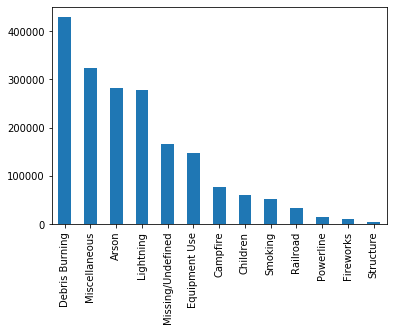

In [44]:
#plotting different reasons of fire 
group_by_reason=p_evaluate['STAT_CAUSE_DESCR'].value_counts()
group_by_reason.plot(kind='bar')
print(group_by_reason)


In [45]:
#it can be seen that the main reason of fire among the 13 different reasons has been Debris Burning causing approximately 429028 fires over the years 1993 to 2006.
#This is one of the many aspects that can be dealt with while analysing the dataset. Moving ahead with calculating the number of days to contain the fire 

In [46]:
#plotting average number of days taken to contain wildifre in each state of Unted States
diff=days_to_stop['CONT_DOY']-days_to_stop['DISCOVERY_DOY']
days_to_stop['days_to_stop_fire'] = diff 
print(days_to_stop)
#because some fires continued over the next year
days_to_stop.loc[days_to_stop['days_to_stop_fire'] < 0, ['days_to_stop_fire']] = days_to_stop['days_to_stop_fire'] + 365
days_to_stop_group=days_to_stop.groupby(['STATE']).mean().reset_index()


        STATE  DISCOVERY_DOY  CONT_DOY  days_to_stop_fire
0          CA             33      33.0                0.0
1          CA            133     133.0                0.0
2          CA            152     152.0                0.0
3          CA            180     185.0                5.0
4          CA            180     185.0                5.0
...       ...            ...       ...                ...
1880456    CA            165     165.0                0.0
1880457    CA            273     274.0                1.0
1880458    CA            213     218.0                5.0
1880459    CA            148     148.0                0.0
1880460    CA            269     269.0                0.0

[988934 rows x 4 columns]


   STATE  days_to_stop_fire
0     AK          10.890192
1     AL           0.119872
2     AR           0.178034
3     AZ           1.069143
4     CA           0.814488
5     CO           1.323813
6     CT           0.010578
7     DC           0.015385
8     DE           0.212121
9     FL           0.862772
10    GA           0.058505
11    HI          11.578313
12    IA           0.007040
13    ID           4.608310
14    IL           0.301983
15    IN           0.082828
16    KS           0.159498
17    KY           0.491195
18    LA           0.422655
19    MA           0.023947
20    MD           0.454545
21    ME           0.149375
22    MI           0.499310
23    MN           0.205679
24    MO           0.183718
25    MS           0.094116
26    MT           2.033016
27    NC           0.127087
28    ND           0.266648
29    NE           0.183904
30    NH           0.201550
31    NJ           5.093169
32    NM           1.861865
33    NV           1.064415
34    NY           2

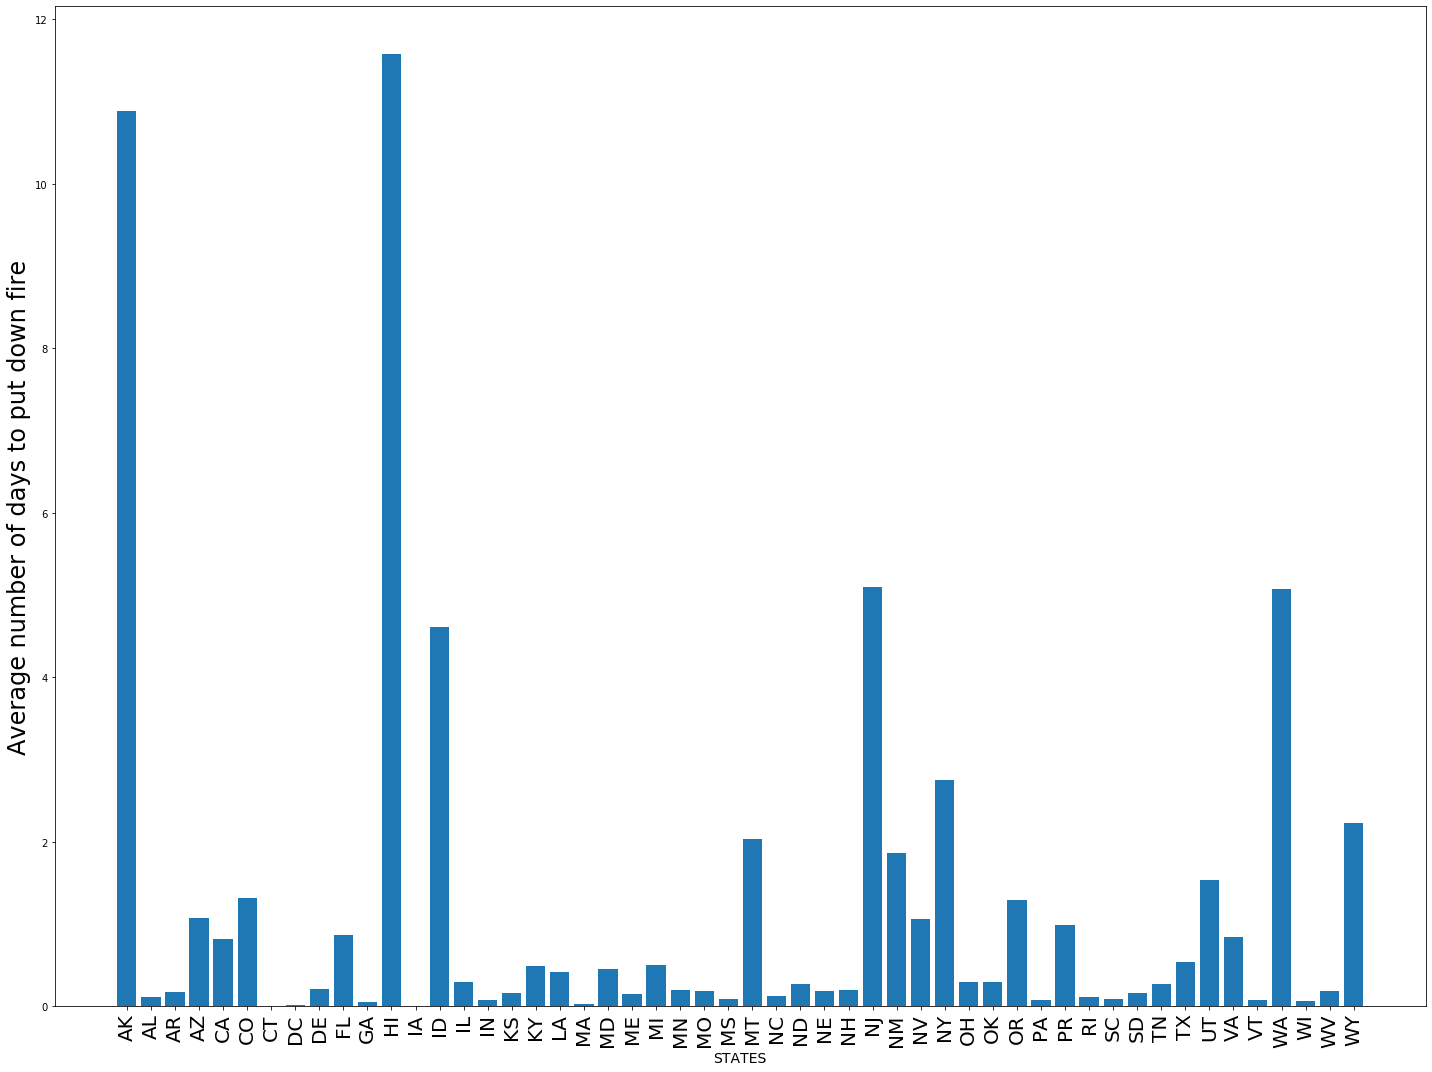

In [47]:
#plotting average number of days it took for each state to put down fire
state_average_days=days_to_stop_group[['STATE','days_to_stop_fire']]
print(state_average_days)
x=state_average_days['STATE']
y=state_average_days['days_to_stop_fire']
y_pos=range(len(x))
plt.figure(figsize=(20,15))
plt.bar(x,y)
plt.xticks(y_pos,x,rotation=90)
plt.tick_params(axis='x',which='major',labelsize=20)
plt.xlabel('STATES',fontsize=14)
plt.ylabel('Average number of days to put down fire',fontsize=24)
plt.tight_layout()

In [48]:
#it can be seen that the average time taken to contain fire ranged from a few hours to 11.5 days over the years. The reason for maximum days to contain fire in Hawaii can be associated to the natural cause of most number of active volcanoes in the US. 

In [49]:
#Plotting reasons causing fire against the average number of days required to contain the fire
diff2=reason_number_of_days['CONT_DOY']-reason_number_of_days['DISCOVERY_DOY']
reason_number_of_days['days_to_stop_fire'] = diff2
reason_number_of_days.loc[reason_number_of_days['days_to_stop_fire'] < 0, ['days_to_stop_fire']] = reason_number_of_days['days_to_stop_fire'] + 365
print(reason_number_of_days)
days_reason_group=reason_number_of_days.groupby(['STAT_CAUSE_DESCR']).mean().reset_index()


          STAT_CAUSE_DESCR  DISCOVERY_DOY  CONT_DOY  days_to_stop_fire
0            Miscellaneous             33      33.0                0.0
1                Lightning            133     133.0                0.0
2           Debris Burning            152     152.0                0.0
3                Lightning            180     185.0                5.0
4                Lightning            180     185.0                5.0
...                    ...            ...       ...                ...
1880456  Missing/Undefined            165     165.0                0.0
1880457              Arson            273     274.0                1.0
1880458          Lightning            213     218.0                5.0
1880459      Miscellaneous            148     148.0                0.0
1880460  Missing/Undefined            269     269.0                0.0

[988934 rows x 4 columns]


     STAT_CAUSE_DESCR  days_to_stop_fire
0               Arson           0.488663
1            Campfire           0.633011
2            Children           0.301273
3      Debris Burning           0.263217
4       Equipment Use           0.443679
5           Fireworks           0.483398
6           Lightning           2.939801
7       Miscellaneous           1.245246
8   Missing/Undefined           0.390896
9           Powerline           0.732882
10           Railroad           0.496918
11            Smoking           0.921506
12          Structure           0.702694


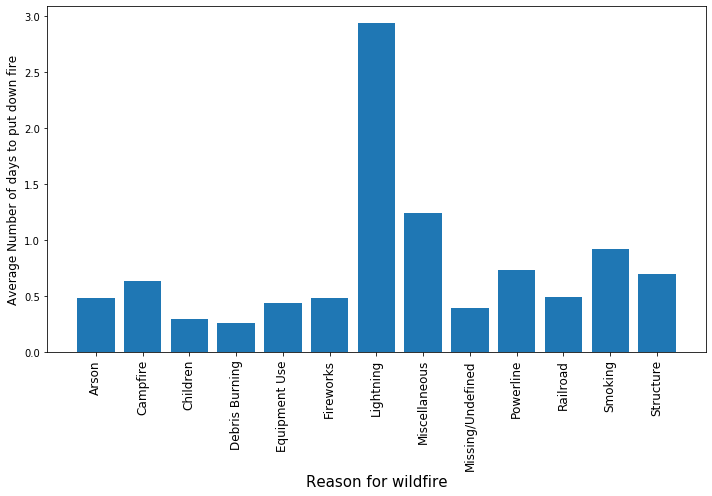

In [50]:
reason_average_days=days_reason_group[['STAT_CAUSE_DESCR','days_to_stop_fire']]
print(reason_average_days)

x=reason_average_days['STAT_CAUSE_DESCR']
y=reason_average_days['days_to_stop_fire']

y_pos=range(len(x))
plt.figure(figsize=(10,7))
plt.bar(x,y)
plt.xticks(y_pos,x,rotation=90)
plt.tick_params(axis='x',which='major',labelsize=12)
plt.xlabel('Reason for wildfire',fontsize=15)
plt.ylabel('Average Number of days to put down fire',fontsize=12)
plt.tight_layout()

In [51]:
# this shows that out of the 13 causes of wildfire, the fires caused by lightning took the most number of average days to be contained, implying that it caused the most disruption as well. This can be further confirmed with more analysis


In [52]:
#Further analysing the relationship between the different states,the number of firs caused and the reasons for the fires
import plotly.graph_objects as go
fig = go.Figure()
states = p_evaluate.STATE.unique()

#grouping by the states and the causes of wildfire in the different states
state_reason_cases=p_evaluate.groupby(['STATE', 'STAT_CAUSE_DESCR']).count().reset_index()

#to set the range for the spider chart or the Radar chart
max_value = state_reason_cases['FIRE_NAME'].max()

stateReasonCases= state_reason_cases[['STATE','STAT_CAUSE_DESCR','FIRE_NAME']]
print(stateReasonCases)

#each state with the total number of wildfires caused due to different reasons have been plotted using a spider chart, with the reasons for wildfire being represented by theta

for state in states:
    spider_state = state_reason_cases.loc[state_reason_cases['STATE'] == state]
    # print(spider_state['FIRE_NAME'])
    fig.add_trace(go.Scatterpolar(r=spider_state['FIRE_NAME'] / 1000, theta=spider_state['STAT_CAUSE_DESCR'], fill='toself',name=state))
    
fig.update_layout(width=1000, height=1000, polar=dict(radialaxis=dict(visible=True, range=[0, max_value/1000])), showlegend=True)
fig.show()



    STATE   STAT_CAUSE_DESCR  FIRE_NAME
0      AK              Arson        385
1      AK           Campfire       1015
2      AK           Children        280
3      AK     Debris Burning       1097
4      AK      Equipment Use        197
..    ...                ...        ...
645    WY  Missing/Undefined        504
646    WY          Powerline        105
647    WY           Railroad        211
648    WY            Smoking        232
649    WY          Structure          9

[650 rows x 3 columns]


In [53]:
#this is an interactive chart, showing the different reasons of wildfires in different states
#each of the states's statistics can be seen individually by selecting the particular state from the list in the right side
#the statistics can be zoomed in for a better understanding and visualization
#this shows that for state California, the main reason for wildfire is the Miscellaneous, which means the reasons are a combination of several reasons. Wrong use of equipment being the second most important reason for causing wildfires in California.
#Similarly, for Hawaii it can be seen that campfire has been the most important reason for causing wildfires. 
#these analysis have shown that the states have different reasons contributing towards the wildfires over the years, implying that its a spatial-temporal dataset
#helping us understand that there is a need of a general model with sub-models for each state to predict the occurence of wildifres in the future
